<a href="https://colab.research.google.com/github/rodirk/spezielle_bioinfo_2_22/blob/main/baum_klassifikation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baum Klassifikation

Aufgabe ist es Bäume anhand verschiedener Messwerte (Stammdurchmesser, Kronenradius, Höhe, Geographischer Ort) ihrer jeweiligen Art zuzuweisen. Die Daten stammen von [Tallo: A global tree allometry and crown architecture database](https://onlinelibrary.wiley.com/doi/10.1111/gcb.16302).

## Setup

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### Data Loading

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ddojo/ddojo.github.io/main/sessions/14_trees/train.tsv", sep="\t")
data["species"] = data.species.astype("category")

In [ ]:
X = data.dropna().drop("species",axis=1)
y = data.dropna().species
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

#### Test data for later (ignore for now)

In [ ]:
test = pd.read_csv("https://raw.githubusercontent.com/ddojo/ddojo.github.io/main/sessions/14_trees/test.tsv", sep="\t")
X_test = test.dropna().drop("tree_id",axis=1)
tree_id = test.dropna().tree_id
pred = pd.DataFrame()
pred["tree_id"] = tree_id
pred["species"] = "unknown"

In [ ]:
pred

,tree_id,species
0,T_75102,unknown
1,T_75103,unknown
2,T_75118,unknown
3,T_75152,unknown
4,T_75161,unknown
...,...,...
8892,T_497140,unknown
8893,T_497324,unknown
8894,T_497361,unknown
8895,T_497401,unknown


## Explore Data

In [ ]:
data

,species,latitude,longitude,stem_diameter_cm,height_m,crown_radius_m
0,Fagus sylvatica,46.01,11.44,5.0,6.7,2.05
1,Fagus sylvatica,46.03,11.44,5.0,11.1,2.90
2,Fagus sylvatica,46.03,11.44,5.0,14.2,4.00
3,Fagus sylvatica,46.03,11.44,5.0,5.7,2.10
4,Fagus sylvatica,46.03,11.44,5.0,8.0,4.15
...,...,...,...,...,...,...
35094,Fagus sylvatica,47.38,9.09,36.0,22.6,4.50
35095,Fagus sylvatica,46.74,6.85,37.0,34.3,4.50
35096,Fagus sylvatica,47.45,9.29,38.0,33.8,5.00
35097,Fagus sylvatica,46.52,6.35,40.0,29.3,6.00


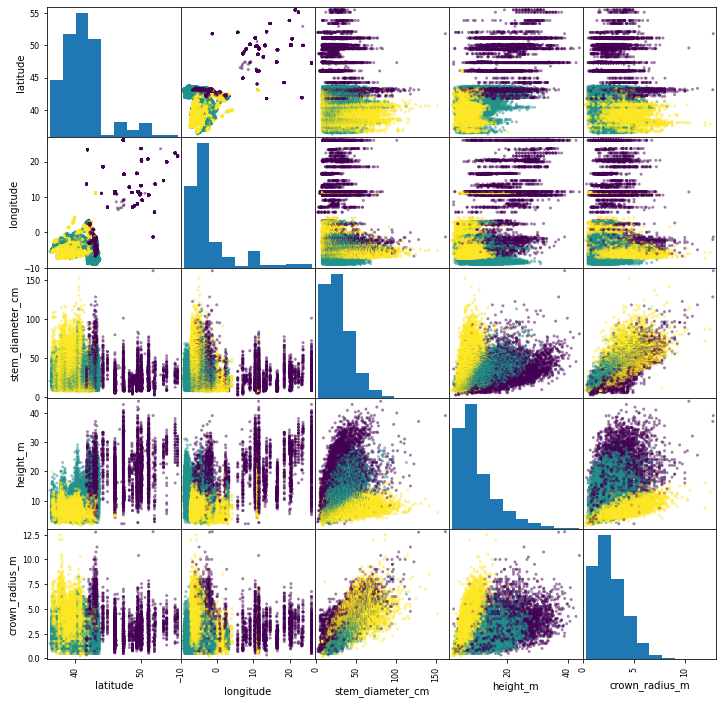

In [ ]:
pd.plotting.scatter_matrix(data.dropna(), c=data.dropna().species.cat.codes, figsize=(12,12));

## Train Models

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
# Train some Decision Trees
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
tree.score(X_val, y_val)

0.8300970873786407

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

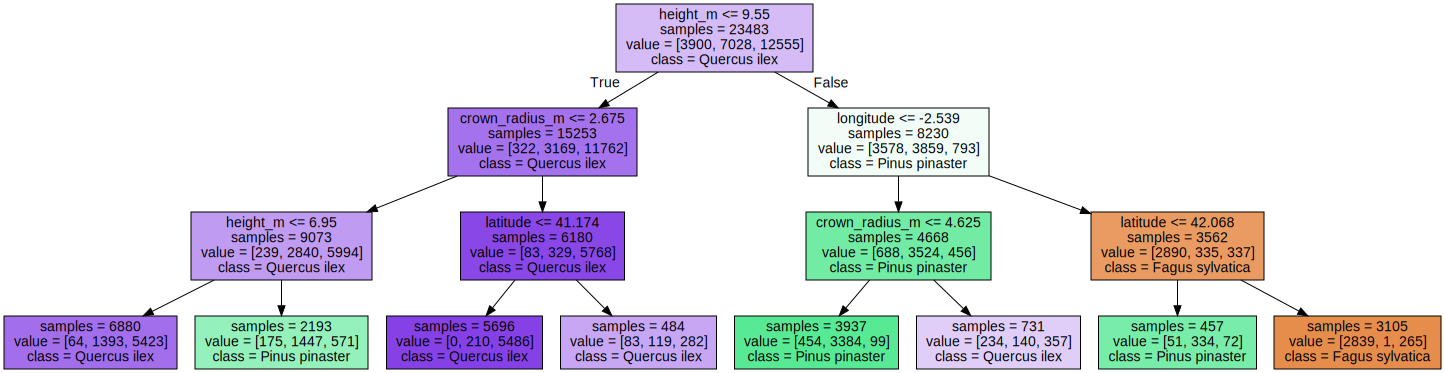

In [11]:
gv = export_graphviz(tree, class_names=tree.classes_, feature_names=tree.feature_names_in_, impurity=False, filled=True)
graphviz.Source(gv)

### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Train some KNN models

In [ ]:
# Train some other model types

## Save Test Predictions (for later, ignore for now)

In [ ]:
pred["species"] = tree.predict(X_test)
pred.to_csv("markus_decisionTree_1.tsv", sep="\t")